In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
# 1. Now, read in the ab_data.csv data. Store it in df. Use your dataframe to answer the questions in Quiz 1 of the classroom

## a. Read in the dataset and take a look at the top few rows here

df=pd.read_csv('/Users/balance/Desktop/AnalyzeABTestResults-2/ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [3]:
## b. Use the cell below to find the number of rows in the dataset.
### total 294478 rows

In [4]:
df.shape[0]

294478

In [5]:
## c. The number of unique users in the dataset.
#### answer : total unit user is 294478

In [6]:
sum(df.duplicated())
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [7]:
## d. The proportion of users converted
### 11.97%

df.converted.describe()

count    294478.000000
mean          0.119659
std           0.324563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

In [8]:
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [9]:
df['converted'].value_counts()[1]/df['user_id'].nunique()

0.12126269856564711

In [10]:
## e. The number of times the new_page and treatment don't match.
### answer : there are 1928+1965= '3893' time new_page and treatment don't match.
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [11]:
df['landing_page'].value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [12]:
### Control (comparison group) :  is a group separated from the rest of the experiment such that the independent variale
### being tested cannot influence the results. 

### Treatment (experiment group): the group that receiveds experimental treatment 
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [13]:
df.groupby('landing_page')['group'].value_counts().unstack().fillna(0)

group,control,treatment
landing_page,,
new_page,1928,145311
old_page,145274,1965


In [14]:
1928+1965

3893

In [15]:
# another solution
df[((df['group']=='treatment')==True) != ((df['landing_page']=='new_page')==True)].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [16]:
## f. Do any of the rows have missing values ?

In [17]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [18]:
# 2.
# For the rows where treatment does not match with new_page or control does not match with old_page, we canot be sure if this row 
# truly received the new or old page. Use Quiz 2 in the classroom to figure out how we should handle these rows.

In [19]:
## a Now use the answer to the quiz to create a new dataset that meets the specifications from the squiz,
## Store your new dataframe in df2

In [20]:
# df9=df.query('group=="treatment"')
# df10=df.query('landing_page=="new_page"')

In [21]:
# df2=pd.merge(df9,df10,on=['user_id','timestamp','group','landing_page','converted'])

In [22]:
df2=df[((df['group']=='treatment')==True) == ((df['landing_page']=='new_page')==True)]

In [23]:
df2.shape

(290585, 5)

In [24]:
# double check all of the correct rows were removed- this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [25]:
#  3. Use df2 and the cells below to answer questions for Quize3 in the classroom
## a How many unique user_ids are in df2

### 290584

In [26]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [27]:
### another solution
unique_users2=df2.user_id.nunique()
unique_users2

290584

In [28]:
## b. There is one user_id repeated in df2, what is it ?
###  1404 rows with uder_id 773192

sum(df2.duplicated('user_id'))

1

In [29]:
## c. what is the row informnation for the repeat user_id ?
### 2893

In [30]:
df2[df2.user_id.duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [31]:
## d. remove one of the rows with a duplicate user_id, but keepyour dataframe as df2
### removed

In [32]:
df2.query('user_id=="773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [33]:
df2=df2.drop_duplicates(subset='user_id',keep='first')

In [34]:
df2.shape

(290584, 5)

In [35]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


In [36]:
df2.describe()

,user_id,converted
count,290584.000000,290584.000000
mean,788004.876222,0.119597
std,91224.735468,0.324490
min,630000.000000,0.000000
25%,709034.750000,0.000000
50%,787995.500000,0.000000
75%,866956.250000,0.000000
max,945999.000000,1.000000


In [37]:
#4. 
# Use df2 in the cells below to answer the quiz questions related to Quiz 4 in the classroom.


In [38]:
## a. What is the probability of an individual converting regardless of the page they receive?
### 0.119

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [39]:
### df2.converted.sum()
df2['converted'].value_counts()


0    255831
1     34753
Name: converted, dtype: int64

In [40]:
df2.shape[0]

290584

In [41]:
df2.converted.sum()/df2.shape[0]

0.11959708724499628

In [42]:
df2.converted.value_counts()[1]/(df2.converted.value_counts()[0]+df2.converted.value_counts()[1])

0.11959708724499628

In [43]:
### another solution
converted1=df2.query('converted=="1"').count()
df2_rows=df2.count()
all_rate=converted1/df2_rows
all_rate

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

In [44]:
## b. Given that an individual was in the control group, what is the probability they converted?
### 0.1203

In [45]:
controlgroup_converted=df[(df["group"]=="control") & (df["converted"]==1)]


In [46]:
convertedall=df.query('converted=="1"').shape[0]

In [47]:
convertedall

35237

In [48]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [49]:
controlgroup_converted.shape[0]

17723

In [50]:
controlgroup_converted.shape[0]/147202

0.12039917935897611

In [51]:
### differ solutions
converted2=df2.query('group=="control" and converted=="1"').count()
control2=df2.query('group=="control"').count()
control_convert_rate=converted2/control2
control_convert_rate

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

In [52]:
## c. Given that an individual was in the treatment group, what is the probability they converted?
## 0.1189

In [53]:
treatmentgroup_converted=df[(df["group"]=="treatment") & (df["converted"]==1)]

In [54]:
treatmentgroup_converted.shape[0]

17514

In [55]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [56]:
treatmentgroup_converted.shape[0]/147276

0.11891957956489856

In [57]:
### different sulutions

In [58]:
converted3=df2.query('group=="treatment" and converted=="1"').count()
group_treatment=df2.query('group=="treatment"').count()
treatment_convert_rate=converted3/group_treatment
treatment_convert_rate

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

In [59]:

df.query('converted=="1"').shape[0]

35237

In [60]:
df.query('converted=="0"').shape[0]

259241

In [61]:
df.shape[0]

294478

In [62]:
df.groupby('group')['converted'].value_counts().unstack().fillna(0)

converted,0,1
group,,
control,129479,17723
treatment,129762,17514


In [63]:
(controlgroup_converted.shape[0]/convertedall)+(treatmentgroup_converted.shape[0]/convertedall)

1.0

In [64]:
## d. What is the probability that an individual received the new page?
### 50%

In [65]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [66]:
df2.query('landing_page=="new_page"').shape[0]/df2.landing_page.shape[0]

0.5000619442226688

In [67]:
## different solution
Newpage_total=df2.query('landing_page == "new_page"').count()
Newpage_prob=Newpage_total/df2.count()
Newpage_prob

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

In [68]:
# e. Consider your results from parts (a) through (d) above, 
# and explain below whether you think there is sufficient evidence to conclude that the new treatment page 
# leads to more conversions.
# Your answer goes here.

In [69]:
# base on the data we have, new page not leads to better conversions rate than old page.

In [70]:
# Part II A/B Test

In [71]:

# Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.
# However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?
# How long do you run to render a decision that neither page is better than another?
# These questions are the difficult parts associated with A/B tests in general.


In [72]:
# 1. For now, consider you need to make the decision just based on all the data provided. 
#If you want to assume that the old page is better unless the new page proves to be definitely 
#better at a Type I error rate of 5%, what should your null and alternative hypotheses be? 
#You can state your hypothesis in terms of words or in terms of  𝑝𝑜𝑙𝑑pold
# and  𝑝𝑛𝑒𝑤pnew , which are the converted rates for the old and new pages. Put your answer here.

# Hypothese : the Pold is better than Pnew
## calculatae the average converted rate between Pold and Pnew
# H0: Uold-Unew >= 0
# H1: Uold-Unew < 0


In [73]:
# Experiment for bootstraping data

In [74]:
sample_data=df.sample(400)
sample_data

,user_id,timestamp,group,landing_page,converted
178350,699277,2017-01-06 03:39:53.089836,control,old_page,0
207915,719041,2017-01-16 09:57:53.773201,control,old_page,0
91395,650716,2017-01-12 11:18:01.153851,control,old_page,0
207740,860664,2017-01-13 09:38:01.429919,treatment,new_page,0
11579,758042,2017-01-10 10:52:30.838060,control,old_page,0
...,...,...,...,...,...
239604,745017,2017-01-03 03:08:43.467773,control,old_page,0
55123,823524,2017-01-10 13:42:53.973416,control,old_page,0
64353,862185,2017-01-15 00:43:02.760325,control,old_page,0
18134,678395,2017-01-06 13:22:33.262013,treatment,new_page,0


In [75]:
# Pold, Pnew = [], []

# for _ in range(10):
    #bootsamp = sample_data(200, replace = True)
    #Pold = bootsamp[bootsamp['landing_page'] == 'old_page'][bootsamp['converted']=='1']
    #Pnew = bootsamp[bootsamp['landing_page'] == 'new_page'][bootsamp['converted']=='1']
     #append the info 
    #Pold
    


In [76]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [77]:
sam_old_page=sample_data[(sample_data['landing_page'] == 'old_page')&(sample_data['converted']==1)]

In [78]:
sam_old_page.converted.describe()

count    21.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: converted, dtype: float64

In [79]:
#proportions=[(sample_data) for _ in range(100)]
# proportions1=[(sample_data['landing_page'] == 'old_page')&(sample_data['converted']) for _ in range(10)]
proportions2=[(sample_data['landing_page'] == 'old_page') for _ in range(100000)]

In [80]:
#proportions2(True)
#np.sum(proportions2)
np.count_nonzero(proportions2)

20900000

In [81]:
proportions3=[(sample_data['landing_page'] == 'new_page') for _ in range(100000)]

In [82]:

np.count_nonzero(proportions3)

19100000

In [83]:
(20800000-19200000)/(400*100000)

0.04

In [84]:
# Uold-Unew >= 0, H0 True.
#The different smaller than 5%, not sinificant

In [85]:
# 2. Assume under the null hypothesis, Pnew and Pold both have "true" success rates equal to the converted success rate 
# regardless of page- that is Pnew and Pold are equal. Furthermore, assume they are equal to the converted rate in 
# ab_data.csv regardless of the page. 

# use a sample size for each page equal to the ones in ab_data.csv

# perform the sampling distributon for the difference in converted between tht two pages over 10000 iterations of 
# calculating an estimate from the null.

# use the cells below to provide the necessary parts of this simulaton, If this doesn't make complete sense righ nor, don't
# worry - you are going to work through the problems below to complete this problem. You can us Quiz 5 in the classrom to 
# make sure you are on the right track. 

In [86]:
df.shape

(294478, 5)

In [87]:
sample_2=df2[(df2["landing_page"]=="old_page")]

In [88]:
sample_old=sample_2.sample(294478,replace=True)


In [89]:
sample_old.shape

(294478, 5)

In [90]:
sample_1=df2[(df2["landing_page"]=="new_page")]

In [91]:
sample_1.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [92]:
sample_new=sample_1.sample(294478,replace=True)

In [93]:
sample_new.shape

(294478, 5)

In [94]:
# perform the sampling distributon for the difference in converted between the two pages over 10000 iterations of 
# calculating an estimate from the null.

In [95]:
sample_old.converted.mean(), sample_new.converted.mean()

(0.12034854895781688, 0.11890531720535999)

In [96]:
# bootstraping the data

sample_old2, sample_new2, diffs = [], [], []

for _ in range(10000):
    bootsample=sample_data.sample(400,replace=True)
    sample_old1 = bootsample[(bootsample["landing_page"]=="old_page")].converted.mean()
    sample_new1 = bootsample[(bootsample["landing_page"]=="new_page")].converted.mean()
    # append the info 
    sample_old2.append(sample_old1)
    sample_new2.append(sample_new1)
    diffs.append(sample_new1-sample_old1) 

In [97]:
np.std(sample_old2)

0.020863347281583386

In [98]:
np.std(sample_new2)

0.02536917879105276

In [99]:
np.std(diffs)

0.033044832901056545

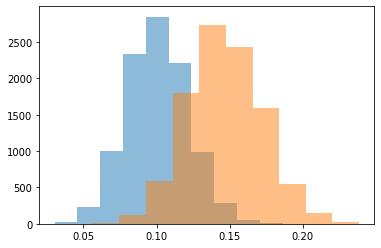

In [100]:
plt.hist(sample_old2, alpha = 0.5);
plt.hist(sample_new2, alpha = 0.5); 
# They look pretty normal to me!

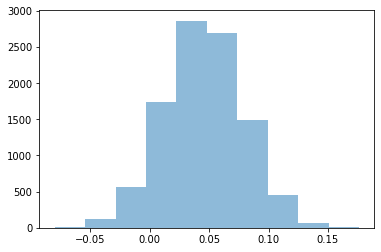

In [101]:
plt.hist(diffs, alpha = 0.5); 
# again normal - this is by the central limit theorem 

In [102]:
null_vals = np.random.normal(0, np.std(diffs), 10000) 
# Here are 10000 draws from the sampling distribution under the null

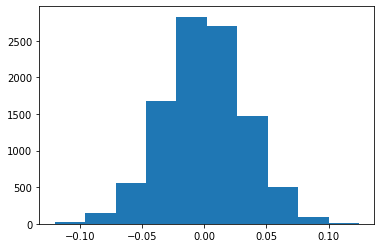

In [103]:
plt.hist(null_vals); 
#Here is the sampling distribution of the difference under the null

In [104]:
null_vals

array([-0.04375347, -0.00125819, -0.05194043, ...,  0.05822417,
        0.02962238, -0.01192276])

In [105]:
## Finish the bootstraping experiment , continue the quizs below.

In [110]:
## a. What is the conversion rate for  P𝑛𝑒𝑤 under the null ?

## 0.1195


In [112]:

P_new=(df2.converted==1).mean()
P_new

0.11959708724499628

In [114]:
## b. What is the conversion rate for  P𝑜𝑙𝑑 under the null ?

## 0.1195



In [115]:

P_old=(df2.converted==1).mean()
P_old

0.11959708724499628

In [116]:
## C. What is Nnew, the number of idividuals in the treatment group ?
### 145310

In [117]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [118]:
Nnew=df2[(df2['landing_page'] == 'new_page')&(df2['group']=='treatment')].nunique()[0]

In [119]:
Nnew

145310

In [120]:
## d what is Nold, the number of individuals in the control group ?
### 145274

In [121]:
Nold=df2[(df2['landing_page'] == 'old_page')&(df2['group']=='control')].nunique()[0]

In [122]:
Nold

145274

In [123]:
## e. simulate Nnew transactions with a conversion rate of Pnew under the null, 
## store these Nnew 1's and 0's in new_page_converted.

In [124]:
## Generates a random sample from [0,1] with Nnew size, the probabilities associated with each entry in [0,1],
## if not given the sample assumes a uniform distribution over all entries in [0,1]

new_page_converted=np.random.choice([0,1],size=Nnew,p=[1-P_new,P_new])
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

In [125]:
## f simulate Nold tansactions with a conversion rate of Pold under the null. 
## Store these Nold 1's and 0's in old_page_converted

In [126]:
## Generates a random sample from [0,1] with Nold size, the probabilities associated with each entry in [0,1],
## if not given the sample assumes a uniform distribution over all entries in [0,1]

old_page_converted=np.random.choice([0,1],size=Nold,p=[1-P_old,P_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
# g Find Pnew-Pold for your simulated values from part(e) and (f)

In [128]:
new_page_converted.mean() - old_page_converted.mean()

-0.0013167120561978218

In [129]:
# h,
#create 10000 Pnew-Pold values using the same simulation process you used in parts(a) thyrough(g) above. Store
# all 10000 values in Numpy array called p_diffs.

In [130]:
## Draw samples from a binomial dibribution with specified parameter,
## (New trials and P_new probability , with sie 10000)
new_converted_simula=np.random.binomial(Nnew,P_new, 10000)/Nnew

## ## Draw samples from a binomial dibribution with specified parameter,
## (New trials and P_old probability,with sie 10000)
old_converted_simula=np.random.binomial(Nold,P_old, 10000)/Nold

In [132]:
p_diffs=new_converted_simula-old_converted_simula

In [133]:
p_diffs

array([ 8.30549561e-04, -2.39726649e-03,  1.10613690e-03, ...,
       -5.59738777e-04, -1.14448702e-03, -9.13917329e-05])

In [134]:
# i.
# Plot a histogram of p_diffs, Does this plot look like what you expected ?
# use the matching problem in the classroom to assure you fully understand what was computed here. 

# see above

(array([8.000e+00, 1.100e+02, 6.320e+02, 2.000e+03, 3.127e+03, 2.578e+03,
        1.204e+03, 3.040e+02, 3.500e+01, 2.000e+00]),
 array([-0.00462023, -0.00364291, -0.0026656 , -0.00168828, -0.00071096,
         0.00026635,  0.00124367,  0.00222098,  0.0031983 ,  0.00417562,
         0.00515293]),
 <a list of 10 Patch objects>)

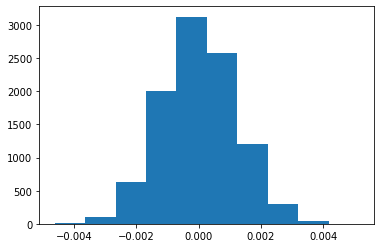

In [135]:
plt.hist(p_diffs)

In [136]:
# j. what proportion of the p_diffs are greater than the actual difference observed in ab_data.csv ? 


# different solution
# df2.query('group=="treatment"')['converted'].mean()-df2.query('group=="control"')['converted'].mean()

In [137]:
actual_diffs=df2[(df2["landing_page"]=="new_page")].converted.mean()-df2[(df2["landing_page"]=="old_page")].converted.mean()


In [138]:
actual_diffs

-0.0015782389853555567

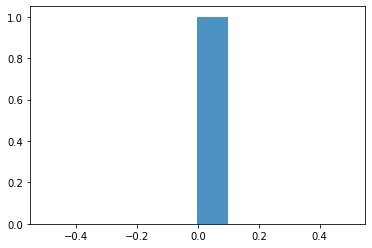

In [139]:
plt.hist(actual_diffs, alpha=0.8);

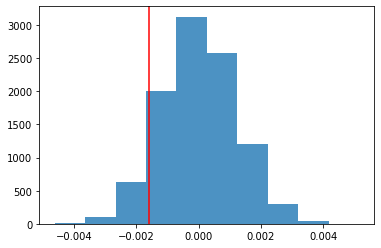

In [140]:
plt.hist(p_diffs, alpha = 0.8);
plt.axvline(actual_diffs,color="r")

In [141]:
p_diffs=np.array(p_diffs)
p_value=(p_diffs > actual_diffs).mean()
p_value

0.9105

In [142]:
# k.   
# please explain using the vocabulary you've learnied in this course what you just computed in part j. 
#what is this value called in scientific studies?
#what does this value mean in terms of whether or not there is a difference between the new and old pages ? 

# put your answer here. 


In [143]:
# answer:  it called p-value in scientific studies. 
# it indicating the sifnificant of the differents. the p_value is larger than 0.05 and we therefore, can't 
# said that the result is significant. 

In [144]:
# I .  
# We could also use a built_in to achieve simular results .Through using the built-in might be easier to code,
# the above portions are a walkingthorugh of the ideas that are critical to corectly thinking about statistical
# significance. Fill in the belwo to calculat the number of conversions for each page. 
# as well as the number of individuals who received each page. let n_old and n_new referthe the number of rows
# associated with the old page and new pages, respectively. 

In [145]:
import statsmodels.api as sm

convert_old = len(df2[df2.landing_page=='old_page'][df2.converted==1])
convert_new = len(df2[df2.landing_page=='new_page'][df2.converted==1])
n_old = len(df2[df2.landing_page=='old_page'])
n_new = len(df2[df2.landing_page=='new_page'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [146]:
# m. 
# now use stats.proportions_ztest to compute your test statistic and p-value.

In [147]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative='larger')
print(z_score,p_value)

-1.3109241984234394 0.9050583127590245


In [148]:
# Tells us how significant our z-score is 
from scipy.stats import norm
norm.cdf(z_score)

0.09494168724097551

In [149]:
# Tells us what our critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

In [150]:
# n. 

## what do the z-score and p-value you computed in the previous question mean for the conversion reates of 
## the old and new pages ? Do they agree with the findings in parts j. and k . ? 

In [151]:
## The z-value is 1.311, which samller than the critical value at 95% confidence interval, we agree the null hypothesis.

In [152]:
## The p-value 0.90 is larger than 0.05(0.05 use as the indicator for statistic significance), We agree with the findins in parts j and k. 

In [153]:
## We agree the null hypothesis, there is no statistic sinificant between old page and new page.

In [154]:
# PART III A REGRESSION APPROACH1

In [155]:
## 1. In this final part, you will see that the result you achieved in the A/B test in partII above can also be
## achieved by performing regression. 


In [156]:
#  a .Since each row is either a conversion or no conversion, what type of regression should you be performing in this case ? 
## logistic regression model as logistic regression predicts one of only two outcomes. 

In [157]:
# b. 
##The goal is to use statsmodels to fit the regression model you specified in part a. 
## to see if there is a significant difference in conversion based on which page a customer receives.
## However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.
## Add an intercept column, as well as an ab_page column, 
## which is 1 when an individual receives the treatment and 0 if control.

In [158]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [159]:
df2['intercept']=1
df2[['drop','ab_page']] = pd.get_dummies(df2['group'])
df2.drop('drop',axis=1,inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [160]:
df2.shape

(290584, 7)

In [161]:
# c. Use statsmodels to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part b. 
# to predict whether or not an individual converts.

In [162]:
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [163]:
# d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [164]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:41:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [165]:
## e. What is the p-value associated with ab_page? Why does it differ from the value you found in Part II?

# Hint: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in Part II?



In [166]:
# the p-value associated with ab_page is 0.190. 

# PartII The null hypothesisi was that the old page equal or more effectiv at converting users than the new page. 
##partIII They null hypothesisi is that the odl page has the same effectiveness as the new page. 
## the alternate hypothesisi is that the new page is not equal in effectiveness as the old page. 

In [167]:
# f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. 
# Are there any disadvantages to adding additional terms into your regression model?


In [168]:
# The advantages of considering other factors to add into my regression model is that we would be able to
# find out other factors that my influence why a person converts or does not convert. An example is the demography
# of convets. Perhaps you find out that most of your converts are in a specific age bracketm or are a specific
# gender, or are from a specific country. you can then begin to use that information when you market or decide
# on designing a new page. 

# Although considering orther factors that could help us determine the cause of converts beyond the new page 
# versus the old page could provide further insight as to whether the new page really affects or doesn't affect
# or doesnt't affect the conversion rate. ther are some disadvantges. 
# 

In [169]:
# g. Now along with testing if the conversion rate changes for different pages, 

# also add an effect based on which country a user lives in. 
# You will need to read in the countries.csv dataset and merge together your datasets on the appropriate rows. 
# Here are the docs for joining tables.
# Does it appear that country had an impact on conversion? 
# Don't forget to create dummy variables for these country columns - Hint: You will need two columns for the three dummy variables. 
# Provide the statistical output as well as a written response to answer this question.

In [170]:
countries=pd.read_csv('/Users/balance/Desktop/AnalyzeABTestResults-2/countries.csv')
df_new=countries.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [171]:
countries_dummies=pd.get_dummies(df_new['country'])
df_countries=df_new.join(countries_dummies)
df_countries=df_countries.drop(['country','US'],axis=1)
df_countries.head()

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [172]:
logit=sm.Logit(df_countries['converted'],df_countries[['intercept','CA','UK']])
results=logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        23:41:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [173]:
np.exp(results.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [174]:
#  h. Though you have now looked at the individual factors of country and page on conversion, 
## we would now like to look at an interaction between page and country to see if there significant effects on conversion.
## Create the necessary additional columns, and fit the new model.
## Provide the summary results, and your conclusions based on the results

In [175]:
## The p-value for both countries are larger 0.05(SIGNIFICANCE LEVE), means they are not sifnificant enough to describe the different of conversion rate

In [177]:
df_countries['CA_new']=df_countries['CA'] * df_countries['ab_page']
df_countries['UK_new']=df_countries['UK'] * df_countries['ab_page']

In [179]:
df_countries.head()

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,CA_new,UK_new
user_id,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [182]:
logit_h=sm.Logit(df_countries['ab_page'],df_countries[['intercept','CA_new','UK_new']])
result_h=logit_h.fit()
result_h.summary()

         Current function value: 45.516664
         Iterations: 35


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Aug 2020   Pseudo R-squ.:                     inf
Time:                        20:06:05   Log-Likelihood:            -1.3226e+07
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3546      0.004    -86.781      0.000      -0.363      -0.347
CA_new        25.6587   3656.091      0.007      0.994   -7140.148    7191.465
UK_new        25.6243   1616.028      0.016      0.987   -3141.733    3192.981
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# Conclusion :

In [ ]:
## The purpose for the A/B test is aimed to tell are there significant different between two samples. It helps 
## the company to make decisions like should they implement the new page or garther more  data to make further decision.

## partII and partIII are two different approch to study the difference. 
## we make hypothesis in PartII, assumed old page conversion raw was >= than the new page. 
## we bootstraping the data we have in order to simultate much larger data sample for geting more confidence interval
## for more precise predition.
## we calculated p-value and z-value and both outcome tell us the hypothesis was correct. 
## We used logistic regression model to calculate p-value in PartIII, which has the simular result with partII

## We also use more factor throwing into the regression model,the "country" to make sure there was consistency 
## amount test subjects in the control group and experiment group. (avoid simpson's parodox). The result tells us 
## the country of residence or user has no sifnificantly effect to the conversion rate. 

In [ ]:
## Finishing Up
## Congratulations! You have reached the end of the A/B Test Results project! You should be very proud of all you have accomplished!
## Tip: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). 
## You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.
## Directions to Submit
## Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).
## Alternatively, you can download this report as .html via the File > Download as submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.
## Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [549]:
from subprocess import call
call(['python', '-m', 'nbconvert', '/Users/balance/Desktop/AnalyzeABTestResults-2/Analyze_ab_test_results_notebook.ipynb'])

1